La famosa base de datos Iris, utilizada por primera vez por Sir RA Fisher. El conjunto de datos está tomado del artículo de Fisher. Tenga en cuenta que es lo mismo que en R, pero no como en el Repositorio de aprendizaje automático de UCI, que tiene dos puntos de datos incorrectos.

Esta es quizás la base de datos más conocida que se encuentra en la literatura sobre reconocimiento de patrones. El artículo de Fisher es un clásico en este campo y hasta el día de hoy se hace referencia a él con frecuencia. (Ver Duda & Hart, por ejemplo). El conjunto de datos contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris. Una clase es linealmente separable de las otras 2; estos últimos NO son linealmente separables entre sí.

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# miramos la correlacion de las variables
print(df.corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [ ]:
# Obtener los nombres de las columnas del DataFrame 'data'xº
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

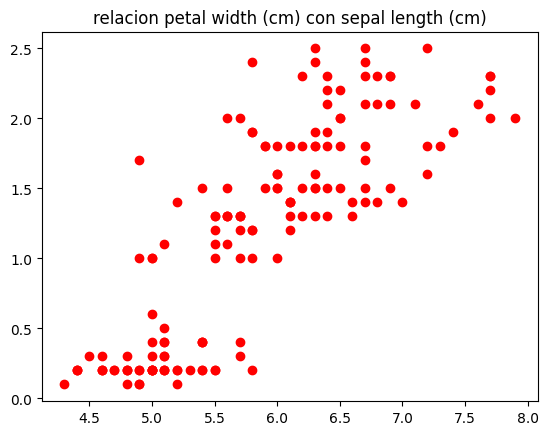

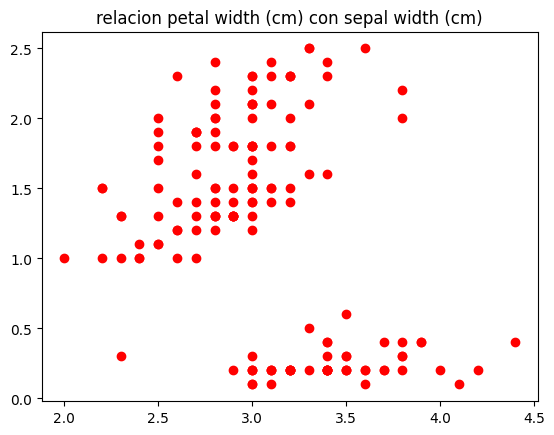

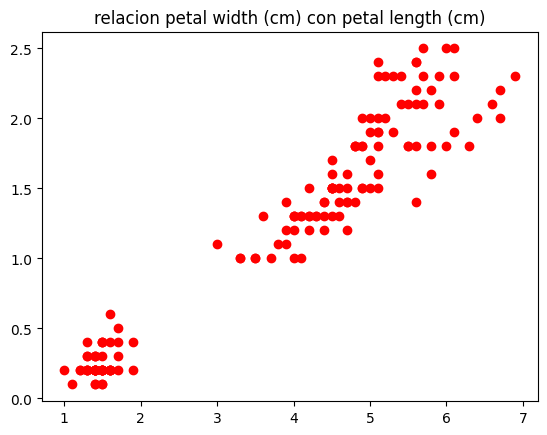

In [ ]:

# Lista de columnas a considerar en el DataFrame 'data'
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Iterar sobre las columnas y crear gráficos de dispersión
for col in cols:
    # Crear un gráfico de dispersión con datos de la columna 'col' en el eje x y 'Sales' en el eje y
    plt.plot(df[col], df['petal width (cm)'], 'ro')

    # Configurar el título del gráfico, utilizando el nombre de la columna actual
    plt.title('relacion petal width (cm) con %s' % col)

    # Mostrar el gráfico
    plt.show()

In [ ]:
# Importar el modelo de regresión lineal desde la biblioteca scikit-learn
from sklearn.linear_model import LinearRegression
# Importar la función train_test_split desde el módulo model_selection de la biblioteca scikit-learn (sklearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Obtener los valores de la columna 'TV' del DataFrame 'data' y darles forma (reshape) a un arreglo bidimensional (-1, 1)
X = df['petal length (cm)'].values.reshape(-1, 1)

# Obtener los valores de la columna 'Sale' del DataFrame 'data'
y = df['petal width (cm)'].values

# Dividimos el conjunto entre el conjunto de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Imprimir la forma (dimensiones) de la matriz de características X_train
print(X_train.shape)

# Imprimir la forma (dimensiones) de la matriz de características X_test
print(X_test.shape)

(105, 1)
(45, 1)


In [ ]:
# Crear una instancia del modelo de regresión lineal
lin_reg = LinearRegression()

# Ajustar (entrenar) el modelo utilizando los datos de entrenamiento
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones utilizando el modelo de regresión lineal 'lin_reg' en el conjunto de prueba 'X_test'
y_pred = lin_reg.predict(X_test)
y_pred

array([1.58188752, 0.3419958 , 2.49114145, 1.49922807, 1.62321724,
       0.25933635, 1.12726056, 1.74720642, 1.49922807, 1.25124973,
       1.74720642, 0.21800663, 0.1766769 , 0.25933635, 0.25933635,
       1.58188752, 2.03651448, 1.25124973, 1.49922807, 1.95385504,
       0.30066608, 1.66454697, 0.30066608, 1.95385504, 2.28449283,
       1.78853614, 2.03651448, 2.07784421, 0.21800663, 0.30066608,
       0.05268773, 0.25933635, 1.45789835, 0.30066608, 0.1766769 ,
       1.70587669, 1.49922807, 0.25933635, 0.21800663, 0.25933635,
       1.74720642, 1.49922807, 1.58188752, 0.1766769 , 0.25933635])

In [ ]:
# Imprimir las predicciones y los valores reales de las primeras 4 instancias
print('Predicciones: {}, valores reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [1.58188752 0.3419958  2.49114145 1.49922807], valores reales: [1.2 0.3 2.3 1.5]


In [ ]:

# Calcular el coeficiente de determinación (R^2) del modelo 0 a 1
r_squared = lin_reg.score(X_test, y_test)

# Calcular la raíz del error cuadrático medio (RMSE) entre las predicciones y los valores reales
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

0.9445739521923764 0.18784422728496195


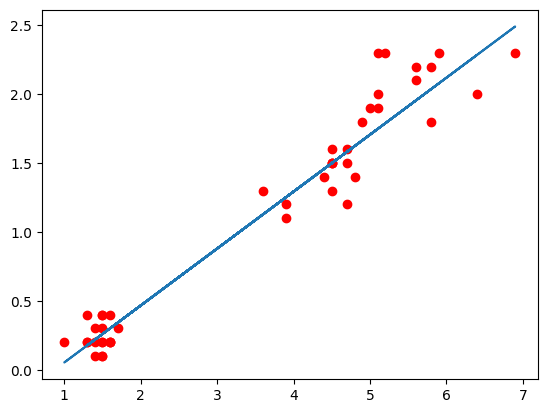

In [ ]:

# Gráfico de los datos de test contra el modelo
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred.reshape(-1,1))
plt.show()

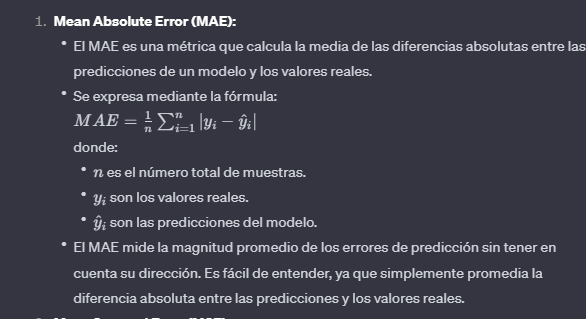

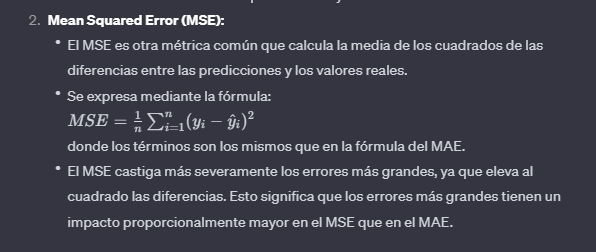

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# El RMSE se obtiene tomando la raíz cuadrada del MSE. La razón de utilizar el RMSE en lugar del MSE es que la raíz cuadrada convierte las unidades de vuelta a la escala original de los datos, lo que facilita la interpretación.
rmse = np.sqrt(mse);
print(mae)
print(mse)
print(rmse)

0.14595580519004583
0.03528545372428444
0.18784422728496195
